In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
import math 
import seaborn as sea
import statistics
import re
from scipy import stats
from numpy import percentile
from sklearn.linear_model import LinearRegression

In [2]:
path = "BankChurners.csv"
bank = pd.read_csv(path, na_values = "Unknown")
bank.head()
names = ["CLIENTNUM","Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
numeric_names = ["CLIENTNUM","Customer_Age","Months_on_book","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio",
                 "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                 "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

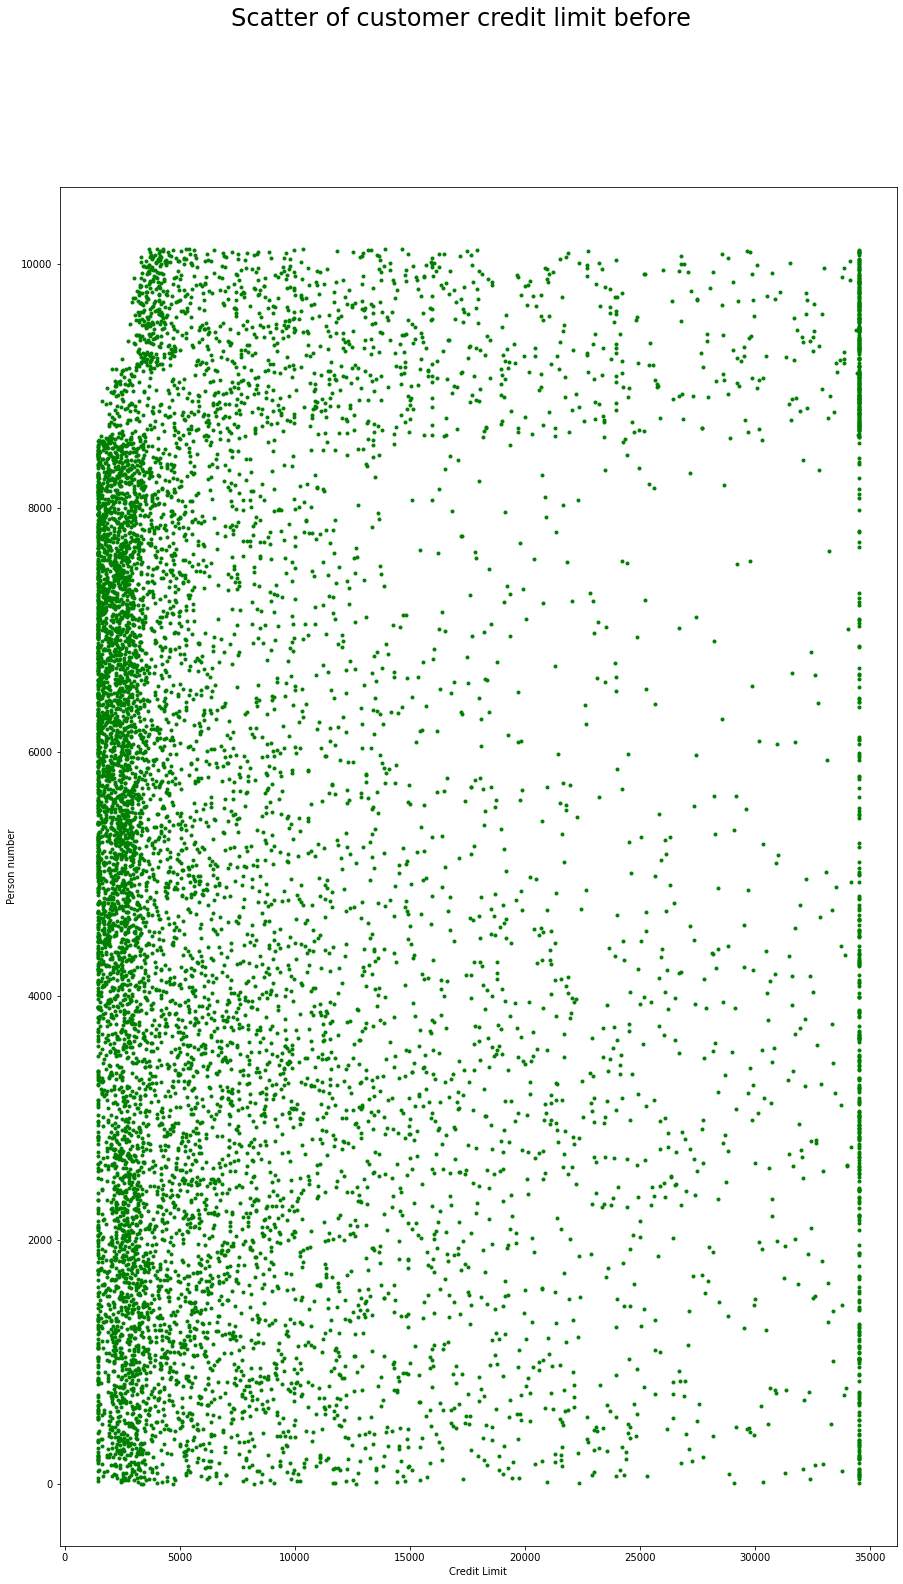

In [3]:
fig, ax = mpl.subplots(figsize=(15, 25))
mpl.suptitle('Scatter of customer credit limit before \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
ax.scatter(x = bank['Credit_Limit'], y = range(len(bank)), marker = ".", color = "Green")
mpl.xlabel("Credit Limit")
mpl.ylabel("Person number")
mpl.show()

find and filter out missing and incorrect values

In [4]:
#find and filter out missing and incorrect values
bank.isnull().sum()

CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                                                                                                         749
Income_Category            

In [5]:
status = bank["Marital_Status"]
married = 0
single = 0
divorced = 0
a = ["Married","Single","Divorced"]
for i in range(len(status)):
    if status[i] == "Married":
        married += 1
    elif status[i] == "Single":
        single += 1
    elif status[i] == "Divorced":
        divorced += 1
print("Married - ",married )
print("Single - ",single )
print("Divorced - ",divorced )
full = married + single + divorced
perc_m = ((married)/full)
perc_s = ((single)/full)
perc_d = ((divorced)/full)
print("Married - " ,perc_m )
print("Single - "  ,perc_s )
print("Divorced - ",perc_d )


Married -  4687
Single -  3943
Divorced -  748
Married -  0.499786734911495
Single -  0.4204521219876306
Divorced -  0.07976114310087438


In [6]:
for i,num in enumerate(bank['Marital_Status']):
    if type(num) == float :
        arr = np.random.choice(a, 1, p=[0.4997, 0.4204,0.0799])
        string = ''.join(arr)
        bank.at[i, 'Marital_Status'] = string

In [7]:
bank["Education_Level"].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [8]:
status = bank["Education_Level"]
Graduate = 0
High_School = 0
Uneducated = 0
College = 0
Post_Graduate = 0 
Doctorate = 0
graduate = ["Graduate","High School","Uneducated","College","Post-Graduate","Doctorate"]
for i in range(len(status)):
    if status[i] == "Graduate":
        Graduate += 1
    elif status[i] == "High School":
        High_School += 1
    elif status[i] == "Uneducated":
        Uneducated += 1
    elif status[i] == "College":
        College += 1
    elif status[i] == "Post-Graduate":
        Post_Graduate += 1
    elif status[i] == "Doctorate":
        Doctorate += 1
full = Graduate + High_School + Uneducated + College + Post_Graduate + Doctorate
perc_Graduate = ((Graduate)/full)
perc_High_School = ((High_School)/full)
perc_Uneducated = ((Uneducated)/full)
perc_College = ((College)/full)
perc_Post_Graduate = ((Post_Graduate)/full)
perc_Doctorate = ((Doctorate)/full)
print("Graduate - " ,perc_Graduate )
print("High School - "  ,perc_High_School )
print("Uneducated - ",perc_Uneducated )
print("College - ",perc_College )
print("Post-Graduate - ",perc_Post_Graduate )
print("Doctorate - ",perc_Doctorate )
for i,num in enumerate(bank['Education_Level']):
    if type(num) == float :
        arr = np.random.choice(graduate, 1, p=[perc_Graduate, perc_High_School, perc_Uneducated, perc_College, perc_Post_Graduate, perc_Doctorate])
        string = ''.join(arr)
        bank.at[i, 'Education_Level'] = string

Graduate -  0.36338289962825276
High School -  0.23385223048327136
Uneducated -  0.17274628252788105
College -  0.11768122676579926
Post-Graduate -  0.05994423791821561
Doctorate -  0.052393122676579924


In [9]:
inc_cat = bank["Income_Category"].value_counts()
print(inc_cat)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64


In [10]:
status = bank["Income_Category"]
full = 0
money  = ['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +']
for i in range(len(inc_cat)):
    full+=inc_cat[i]
perc_lt40 = inc_cat[0]/full
perc_40t60 = inc_cat[1]/full
perc_60t80 = inc_cat[3]/full
perc_80t120 = inc_cat[2]/full
perc_gt120 = inc_cat[4]/full
for i,num in enumerate(bank['Income_Category']):
    if type(num) == float :
        arr = np.random.choice(money, 1, p=[perc_lt40, perc_40t60, perc_60t80, perc_80t120, perc_gt120])
        string = ''.join(arr)
        bank.at[i, 'Income_Category'] = string

In [11]:
bank.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

unify the format, make the necessary conversions (non-numeric → numeric) if needed

In [12]:
#unify the format, make the necessary conversions (non-numeric → numeric) if needed
for i,num in enumerate(bank['Income_Category']):
    if num == "Less than $40K" :
        string = ''.join("40000")
        bank.at[i, 'Income_Category'] = string
    elif num == "$40K - $60K" :
        string = ''.join("60000")
        bank.at[i, 'Income_Category'] = string
    elif num == "$60K - $80K" :
        string = ''.join("80000")
        bank.at[i, 'Income_Category'] = string
    elif num == "$80K - $120K" :
        string = ''.join("120000")
        bank.at[i, 'Income_Category'] = string
    elif num == "$120K +" :
        string = ''.join("121000")
        bank.at[i, 'Income_Category'] = string
pd.to_numeric(bank['Income_Category'], errors ='coerce')

0         80000
1         40000
2        120000
3         40000
4         80000
          ...  
10122     60000
10123     60000
10124     40000
10125     60000
10126     40000
Name: Income_Category, Length: 10127, dtype: int64

In [13]:
attrition_dict = {'Existing Customer' : 1,'Attrited Customer': 0}
gender_dict = {'M' : 1,'F' : 0}
education_dict = {'Uneducated' : 0,'Graduate' : 1 ,'High School' : 2,'College' : 3,'Post-Graduate' : 4,'Doctorate' : 5}
marital_dict = {'Married' : 1, 'Single' : 0, 'Divorced' : 2}
card_dict = {'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}

for i,num in enumerate(bank['Attrition_Flag']):
    bank.at[i, 'Attrition_Flag'] = attrition_dict[num]

for i,num in enumerate(bank['Gender']):
    bank.at[i, 'Gender'] = gender_dict[num] 
    
for i,num in enumerate(bank['Marital_Status']):
    bank.at[i, 'Marital_Status'] = marital_dict[num]     

for i,num in enumerate(bank['Education_Level']):
    bank.at[i, 'Education_Level'] = education_dict[num]

for i,num in enumerate(bank['Income_Category']):
    number_list = re.findall(r"\d+",num)
    bank.at[i, 'Income_Category'] = int(max(number_list)) 
    
for i,num in enumerate(bank['Card_Category']):
    bank.at[i, 'Card_Category'] = card_dict[num]

for i in names:
    pd.to_numeric(bank[i], errors ='coerce')

In [14]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,2,1,80000,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,1,0,40000,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,1,1,120000,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,2,1,40000,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,0,1,80000,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [15]:
    #Q1=bank["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"].quantile(0.25)
    #Q3=bank["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"].quantile(0.75)
    #IQR=Q3-Q1
    #print(Q1)
    #print(Q3)
    #print(IQR)
    #Lower_Whisker = Q1 - 1.5*IQR
    #Upper_Whisker = Q3 + 1.5*IQR
    #print(Lower_Whisker, Upper_Whisker)
    #bank = bank[bank["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"] < Upper_Whisker]
    #bank = bank[bank["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"] > Lower_Whisker]
    #sns.boxplot (x = bank["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"])

discover outliers and find a way to deal with them

In [16]:
"""
names = list(bank.columns)
for i in (2, 4) + tuple (range(9, 23)):
    data=bank[names[i]]
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' %(q25, q75, iqr))
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    #print('Identified outliers: %d' %len(outliers))
    outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Identified outliers: %d' %len(outliers))
print('Non-outlier observations: %d' %len(outliers_removed))
"""

"\nnames = list(bank.columns)\nfor i in (2, 4) + tuple (range(9, 23)):\n    data=bank[names[i]]\n    q25, q75 = percentile(data, 25), percentile(data, 75)\n    iqr = q75 - q25\n    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' %(q25, q75, iqr))\n    cut_off = iqr * 1.5\n    lower, upper = q25 - cut_off, q75 + cut_off\n    outliers = [x for x in data if x < lower or x > upper]\n    #print('Identified outliers: %d' %len(outliers))\n    outliers_removed = [x for x in data if x >= lower and x <= upper]\nprint('Identified outliers: %d' %len(outliers))\nprint('Non-outlier observations: %d' %len(outliers_removed))\n"

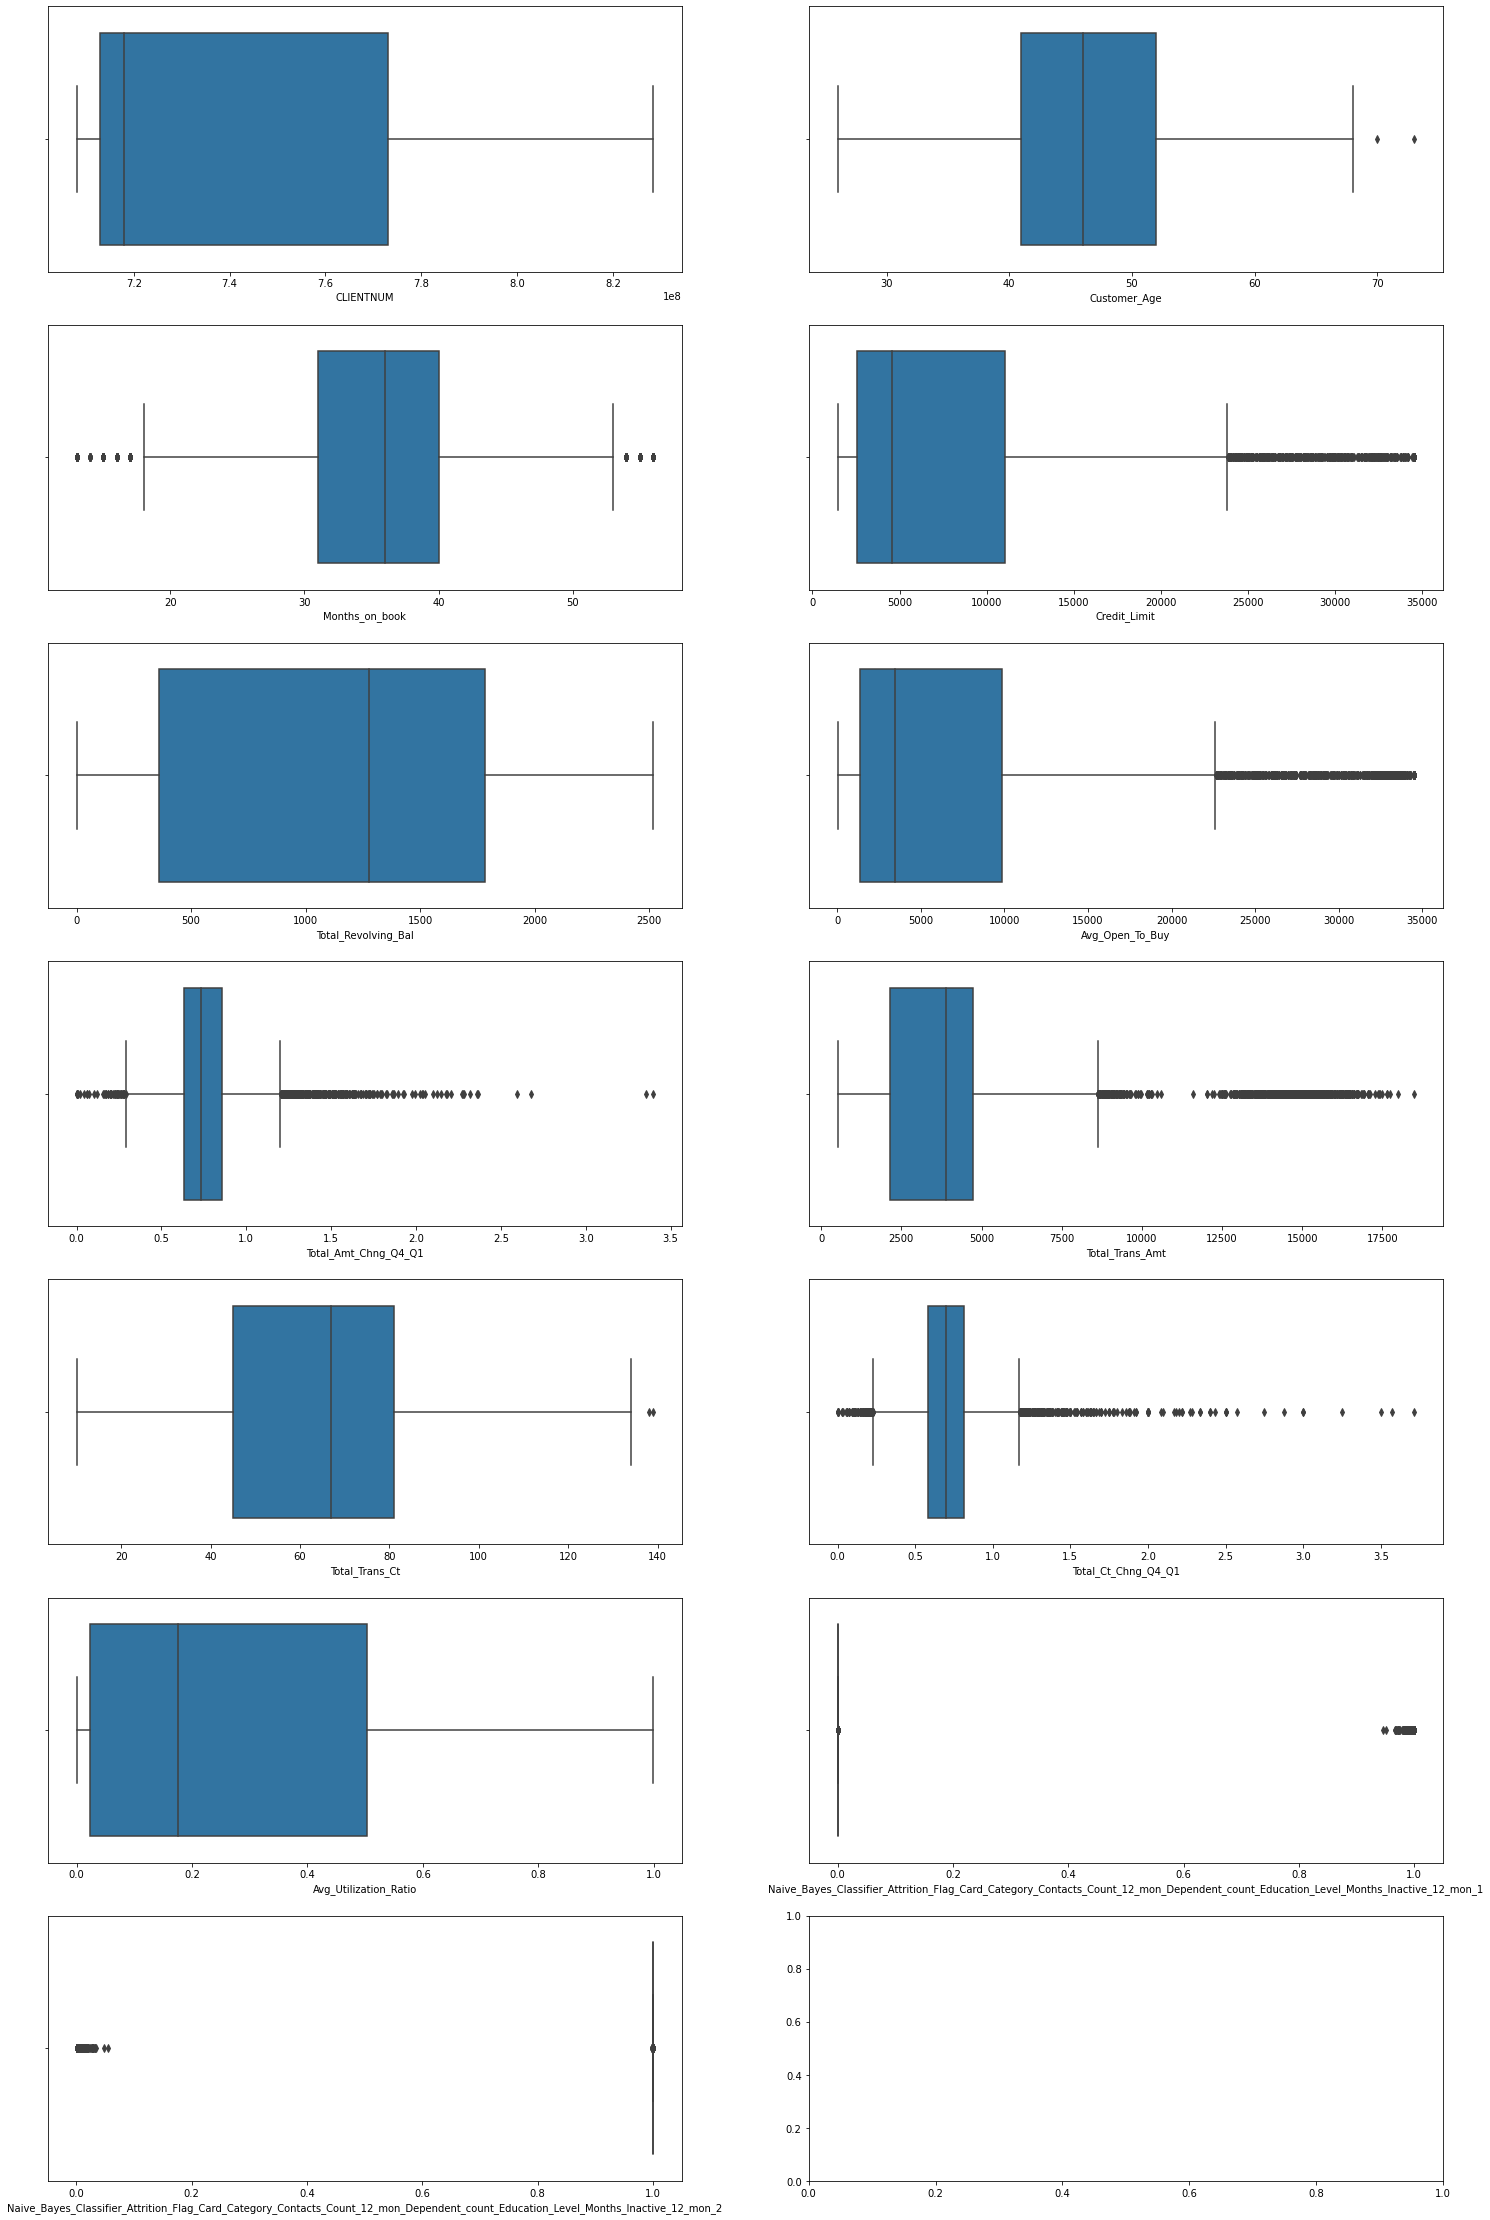

In [17]:
#первоначальные боксплоты

fig, axs = mpl.subplots(7, 2, figsize=(25, 40))
axes = [item for sublist in axs for item in sublist]
j = 0

for i in numeric_names:
    sea.boxplot(data=bank, x=bank[i], ax=axes[j])
    j += 1

mpl.show()

In [18]:
#Z-score метод 
print('До:', bank.shape, '\n')
for i in numeric_names:
    z=np.abs(stats.zscore(bank[i]))
    bank=bank[(z < 3)]
print('После:', bank.shape)

До: (10127, 23) 

После: (9485, 23)


In [19]:
#еще один способ (писали с нуля, но чуточку не вышло)
"""
for i in (2, 4) + tuple(range(9, 23)):
    Q1=bank[bank.columns[i]].quantile(0.25)
    Q3=bank[bank.columns[i]].quantile(0.75)
    IQR=Q3-Q1
    #print(Q1)
    #print(Q3)
    #print(IQR)
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    #print(Lower_Whisker, Upper_Whisker)
    bank = bank[bank[bank.columns[i]] < Upper_Whisker]
    bank = bank[bank[bank.columns[i]] > Lower_Whisker]
"""

'\nfor i in (2, 4) + tuple(range(9, 23)):\n    Q1=bank[bank.columns[i]].quantile(0.25)\n    Q3=bank[bank.columns[i]].quantile(0.75)\n    IQR=Q3-Q1\n    #print(Q1)\n    #print(Q3)\n    #print(IQR)\n    Lower_Whisker = Q1 - 1.5*IQR\n    Upper_Whisker = Q3 + 1.5*IQR\n    #print(Lower_Whisker, Upper_Whisker)\n    bank = bank[bank[bank.columns[i]] < Upper_Whisker]\n    bank = bank[bank[bank.columns[i]] > Lower_Whisker]\n'

In [20]:
#for i in (2, 4) + tuple(range(9, 23)):
    #Q1=bank[bank.columns[i]].quantile(0.25)
    #Q3=bank[bank.columns[i]].quantile(0.75)
    #IQR=Q3-Q1
    #print(Q1)
    #print(Q3)
    #print(IQR)
    #Lower_Whisker = Q1 - 1.5*IQR
    #Upper_Whisker = Q3 + 1.5*IQR
    #print(Lower_Whisker, Upper_Whisker)
    #bank[bank.columns[i]] = bank[bank[bank.columns[i]] < Upper_Whisker]
    #bank[bank.columns[i]] = bank[bank[bank.columns[i]] > Lower_Whisker]
    #print(bank.columns[i])
    #print(" ")
    #print(bank[bank.columns[i]])
    #print(" ")
    #print(bank[bank[bank.columns[i]]])

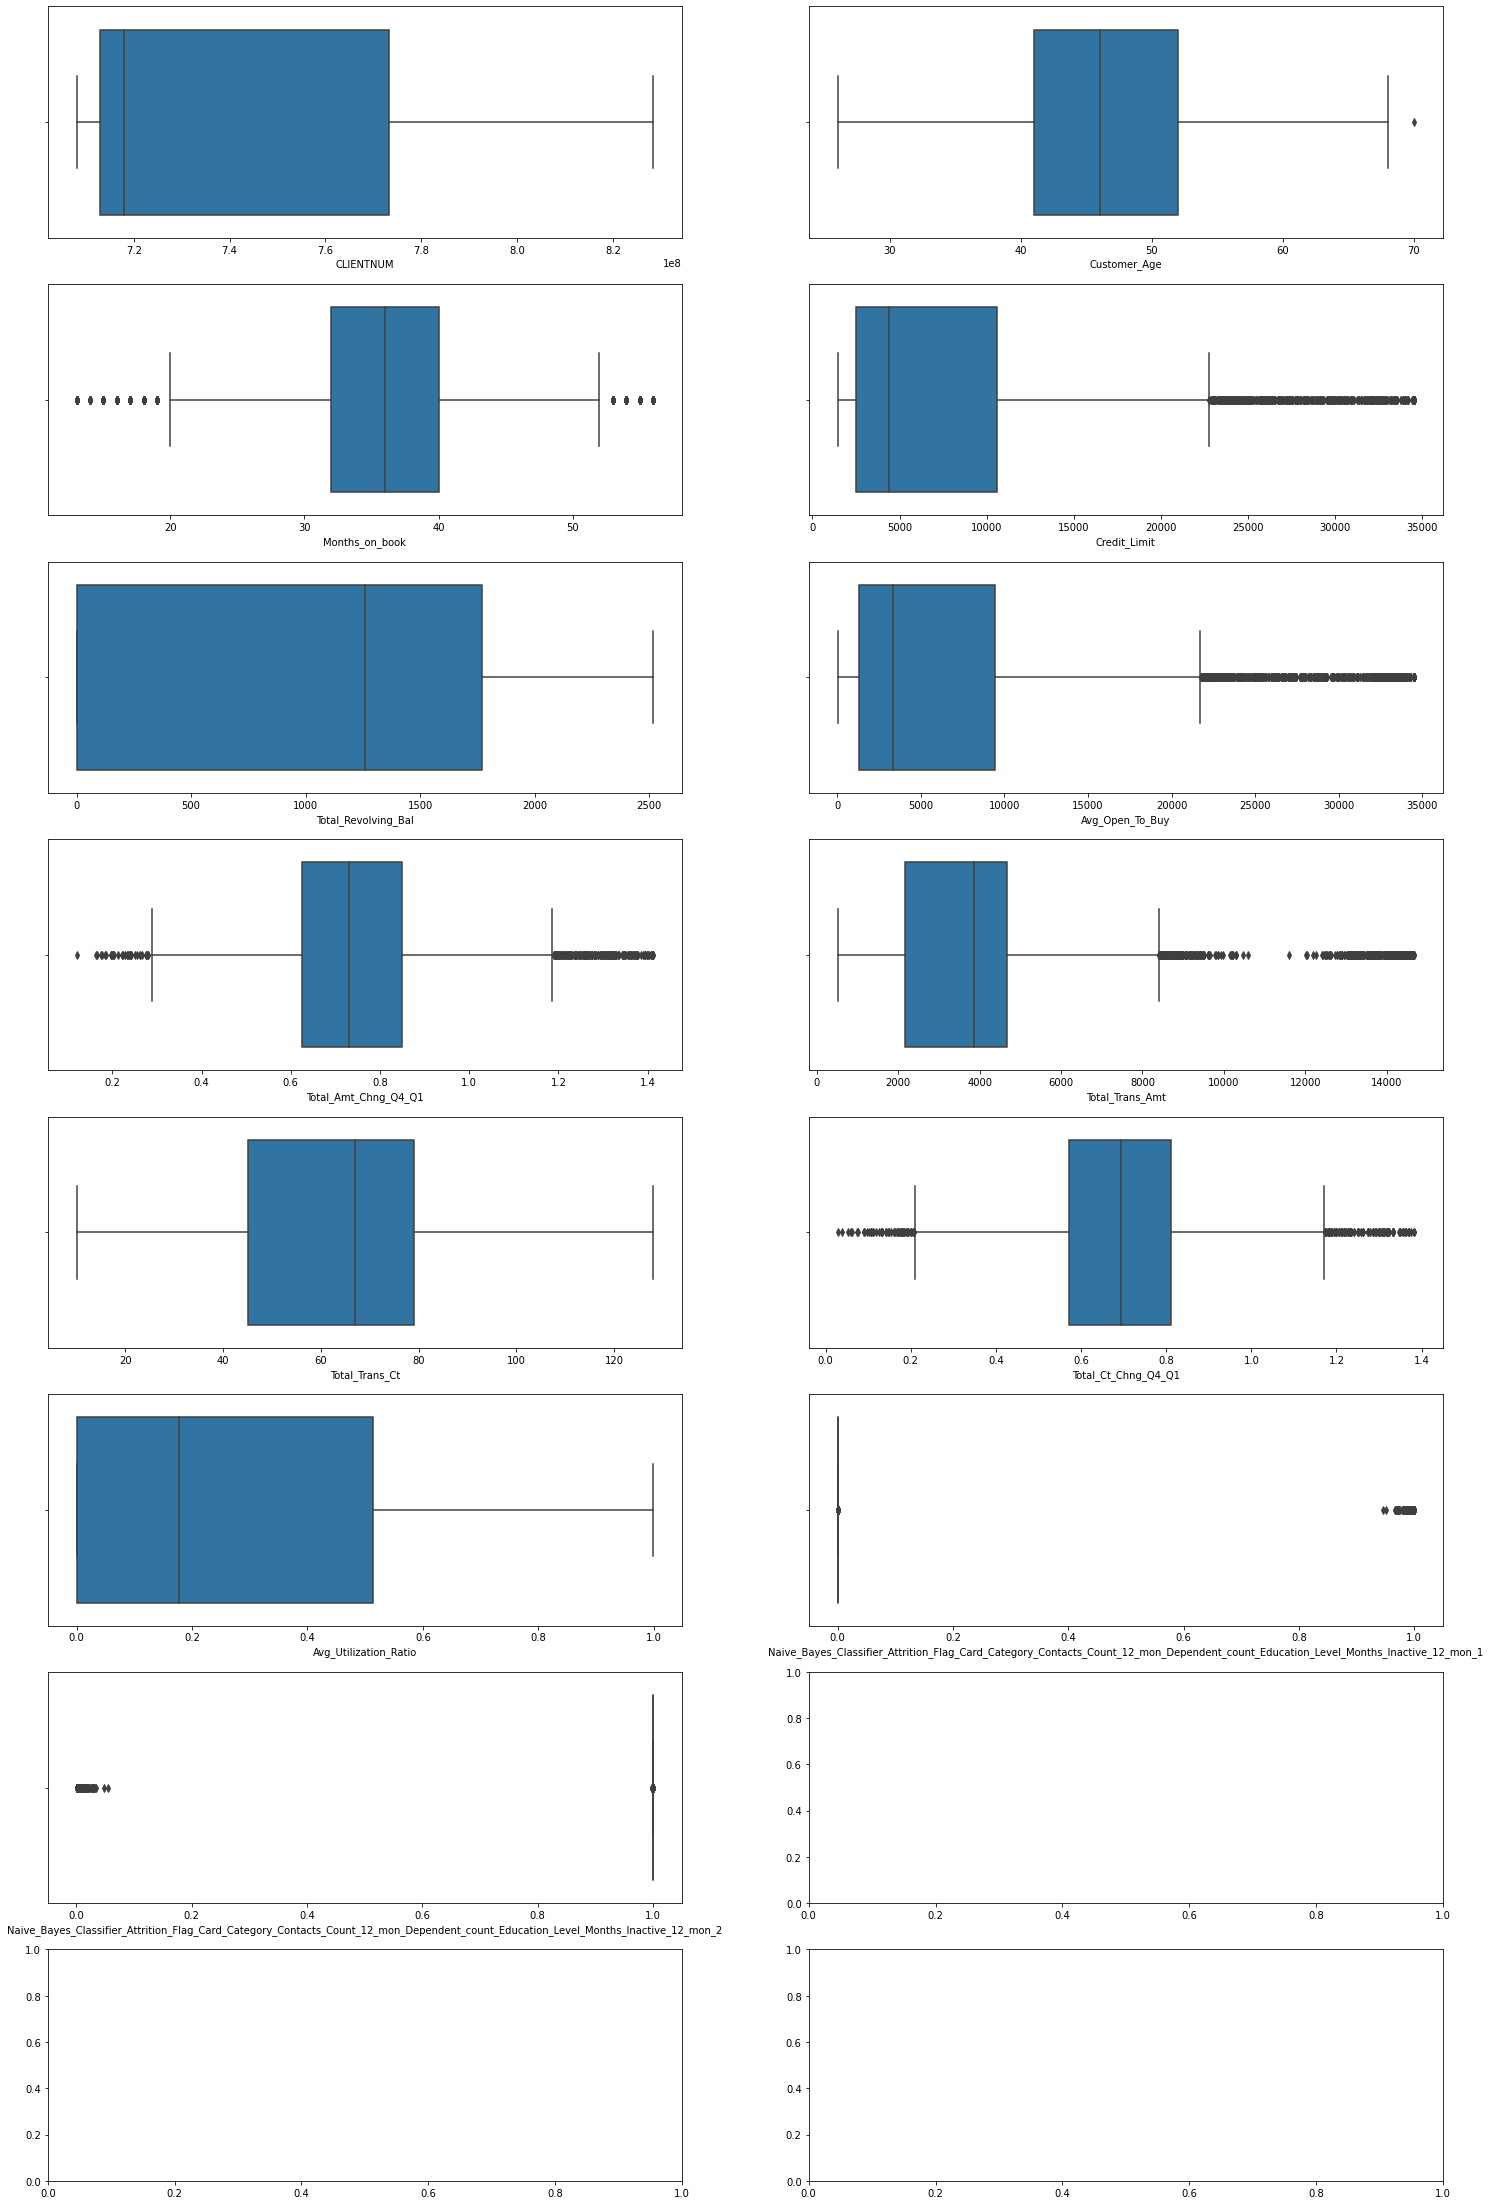

In [21]:
fig, axs = mpl.subplots(7, 2, figsize=(25, 40))
axes = [item for sublist in axs for item in sublist]
j = 0

for i in numeric_names:
    sea.boxplot(data=bank, x=bank[i], ax=axes[j])
    j += 1

mpl.show()

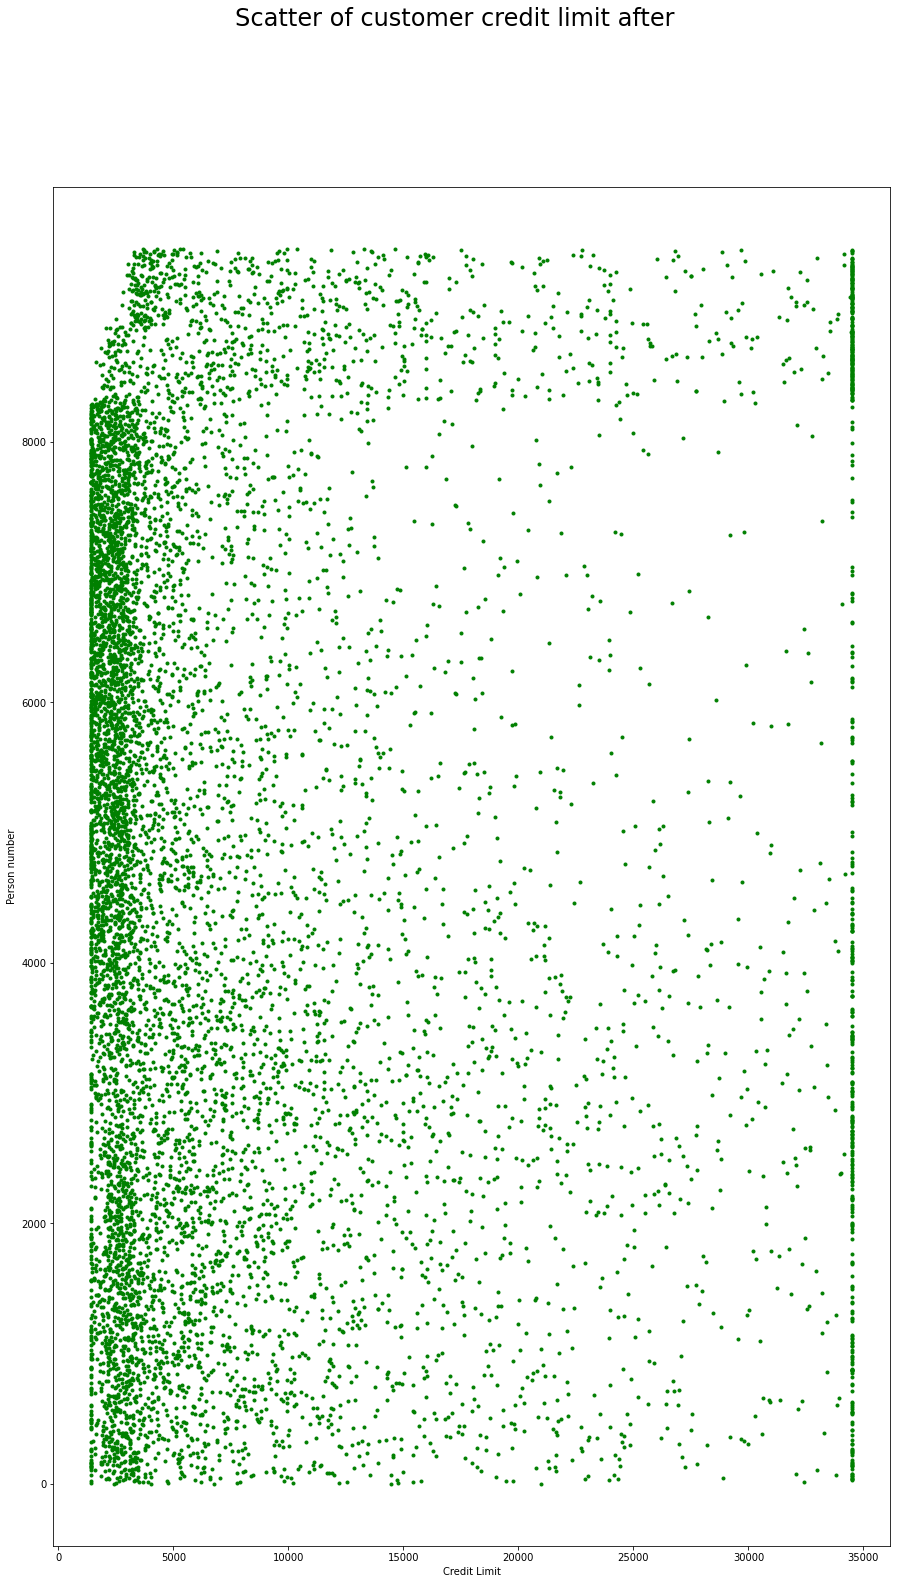

In [22]:
fig, ax = mpl.subplots(figsize=(15, 25))
mpl.suptitle('Scatter of customer credit limit after \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
ax.scatter(x = bank['Credit_Limit'], y = range(len(bank)), marker = ".", color = "Green")
mpl.xlabel("Credit Limit")
mpl.ylabel("Person number")
mpl.show()

In [23]:
bank = bank[bank.columns]

bank.to_csv('BankChurnersFNum.csv')